In [1]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io

In [44]:
MATLAB_OUTPUT = r'/Users/guydavidson/Dropbox/Multitasking Experiment V2/Guy/outputs/outputs-3-dims-4-feats-500-iters-21-Jul-2018.mat'
PYTHON_SINGLE_LAYER_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/single-layer-model-outputs.mat'
PYTHON_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/single-model-matlab-patterns-outputs.mat'
PYTHON_MULTI_LAYER_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/single-model-outputs.mat'


In [45]:
python_output = io.loadmat(PYTHON_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT)
# python_multi_output = io.loadmat(PYTHON_MULTI_LAYER_OUTPUT)
matlab_output = io.loadmat(MATLAB_OUTPUT)

In [47]:
print(matlab_output['mse'].shape)
print(python_output['mse'].shape)
# print(python_multi_output['mse'].shape)

x_max = min([out['mse'].shape[1] for out in (matlab_output, python_output)]) #, python_multi_output)])

(1, 500)
(1, 336)


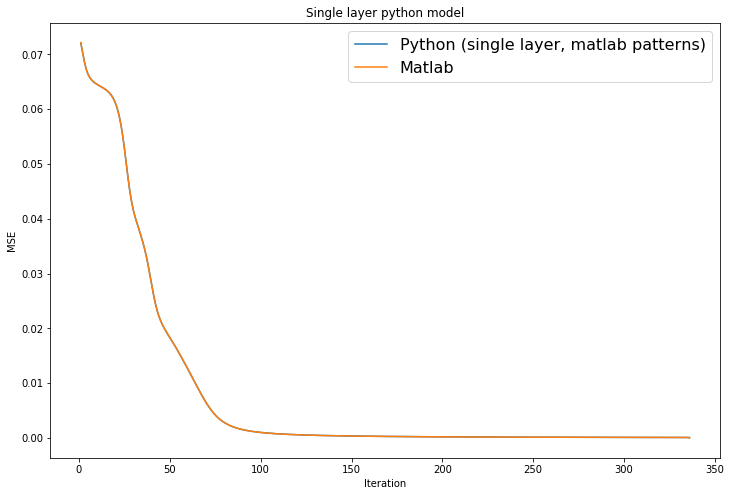

In [49]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x = np.arange(1, x_max + 1, 1)
plt.plot(x, np.squeeze(python_output['mse'][:, :x_max]), label='Python (single layer, matlab patterns)')
# plt.plot(x, np.squeeze(python_multi_output['mse'][:, :x_max]), label='Python (split layers)')
plt.plot(x, np.squeeze(matlab_output['mse'][:, :x_max]), label='Matlab')

plt.legend(loc=1, fontsize=16)
plt.title('Single layer python model')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [55]:
RANDOM_ORDER_MATLAB_OUTPUT = r'/Users/guydavidson/Dropbox/Multitasking Experiment V2/Guy/outputs/outputs-3-dims-4-feats-500-iters-24-Jul-2018.mat'
RANDOM_ORDER_PYTHON_SINGLE_LAYER_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/single-model-random-order-outputs.mat'

In [57]:
random_order_python_output = io.loadmat(RANDOM_ORDER_PYTHON_SINGLE_LAYER_OUTPUT)
random_order_matlab_output = io.loadmat(RANDOM_ORDER_MATLAB_OUTPUT)

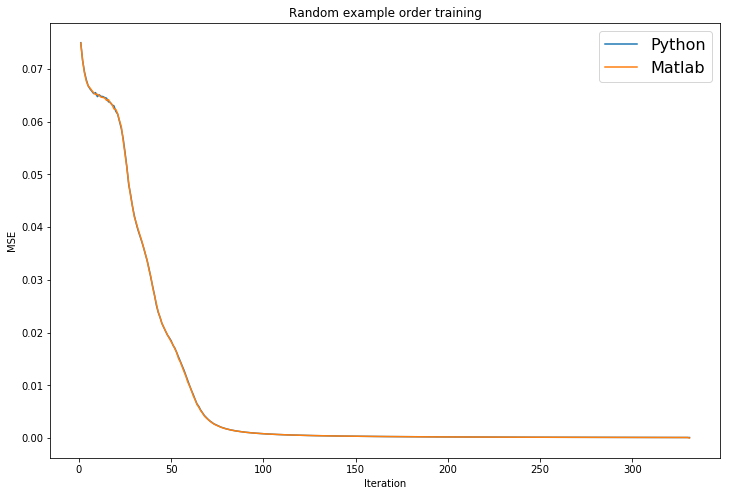

In [59]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x_max = min([out['mse'].shape[1] for out in (random_order_python_output, random_order_matlab_output)]) #, python_multi_output)])
x = np.arange(1, x_max + 1, 1)
plt.plot(x, np.squeeze(random_order_python_output['mse'][:, :x_max]), label='Python')
# plt.plot(x, np.squeeze(python_multi_output['mse'][:, :x_max]), label='Python (split layers)')
plt.plot(x, np.squeeze(random_order_matlab_output['mse'][:, :x_max]), label='Matlab')

plt.legend(loc=1, fontsize=16)
plt.title('Random example order training')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()